## Classification Methods Example Usage

In [1]:
import os
from pathlib import Path
try:
    # '.' if the path is to current folder
    os.chdir(Path(os.path.join(os.getcwd(), '.')).parents[1])
    print(os.getcwd())
except:
    pass

C:\Users\606744\Projects\personal\classification-methods


In [2]:
import pandas as pd
import numpy as np
from methods.classification import Classification

In [5]:
file="./methods/data/iris_dataset.csv"
data = pd.read_csv(file, index_col=None)

In [6]:
data_sub=data[(data.Species=='Iris-setosa') | (data.Species=='Iris-virginica')]

In [7]:
data_sub

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
data_sub.loc[(data_sub['Species']=='Iris-setosa'),'classify']=1

c:\users\606744\envs\wcpvenv\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\606744\envs\wcpvenv\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
data_sub=data_sub.fillna(0)

In [10]:
setosa=len(data_sub[data_sub['classify']==1])/len(data_sub['classify'])
setosa*100

50.0

In [11]:
virginica=1-setosa
virginica*100

50.0

In [12]:
data_sub=data_sub.drop(columns=['Id','Species'])

In [13]:
t=Classification(data_sub, 'classify',split_level=10)

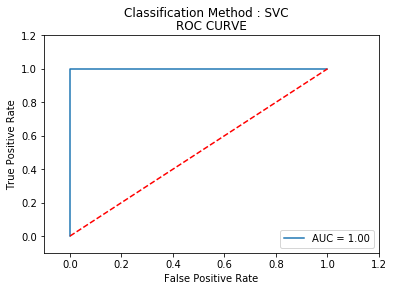

<Figure size 432x288 with 0 Axes>

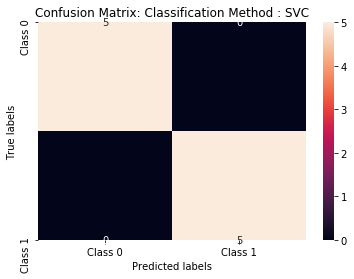

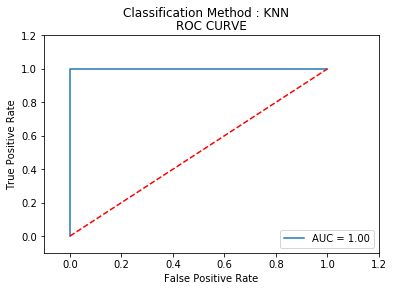

<Figure size 432x288 with 0 Axes>

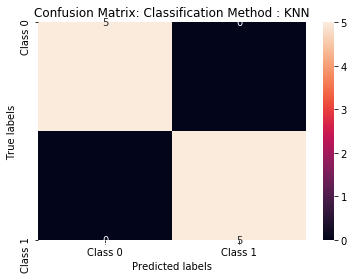

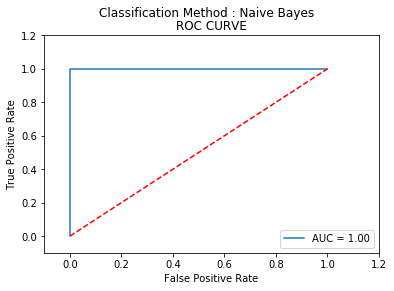

<Figure size 432x288 with 0 Axes>

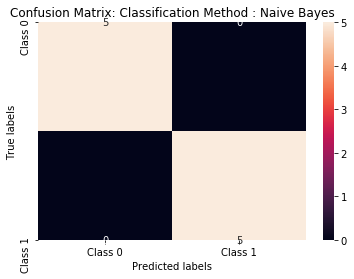

In [14]:
preds1, cm1, roc = t.svm
preds2, cm2, roc = t.KNN()
preds3, cm3, roc = t.GaussNB()